In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from tqdm import trange
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("customer_dataframe.csv", sep="\t", index_col=0)
df.head()

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder
CustomerID,,,,,,,,,,,,,,
17850,1702,21,141,12,48.629,5317.89,6.36,107.25,151.940,31,3.960,34,4.137,3.186
13047,1355,105,309,3,84.688,3089.10,6.64,68.00,193.069,35,3.926,9,5.421,3.875
12583,4978,114,714,100,292.824,6629.34,6.80,132.80,389.961,50,2.140,15,5.804,4.087
13748,439,24,208,8,87.800,948.25,9.36,204.00,189.650,0,3.996,5,4.080,2.322
15100,58,1,32,16,9.667,635.10,175.20,350.40,105.850,22,10.950,3,2.252,2.252


In [3]:
df_aux = df[['MeanSaleOrder', 'TProd', 'MeanProdOrder', 'MeanPSale']]
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4333 entries, 17850 to 12713
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MeanSaleOrder  4333 non-null   float64
 1   TProd          4333 non-null   int64  
 2   MeanProdOrder  4333 non-null   float64
 3   MeanPSale      4333 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 169.3 KB


In [4]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_aux.values)
X

array([[0.01533992, 0.00865911, 0.00621536, 0.00883257],
       [0.01949232, 0.00689371, 0.01082413, 0.00875433],
       [0.03937061, 0.02532612, 0.03742638, 0.00464412],
       ...,
       [0.03634574, 0.00048841, 0.01226994, 0.00834929],
       [0.02295738, 0.00040192, 0.01009714, 0.00874052],
       [0.08021807, 0.00256924, 0.06454499, 0.00451755]])

# Fuzzy C-Means ALGORITHM

In [5]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.fcm import fcm

In [6]:
# load list of points for cluster analysis
sample = X

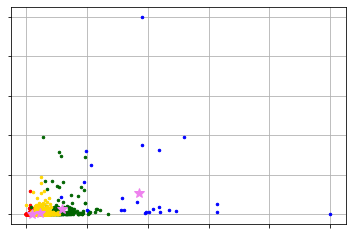

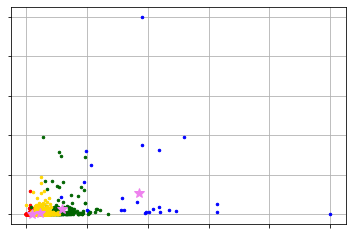

In [7]:
# initialize
initial_centers = kmeans_plusplus_initializer(sample, 4, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
# create instance of Fuzzy C-Means algorithm
fcm_instance = fcm(sample, initial_centers)
# run cluster analysis and obtain results
fcm_instance.process()
clusters = fcm_instance.get_clusters()
centers = fcm_instance.get_centers()
# visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, [x[:2] for x in sample])
visualizer.append_cluster([c[:2] for c in centers], marker='*', markersize=10)
visualizer.show()

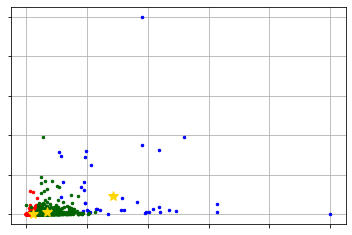

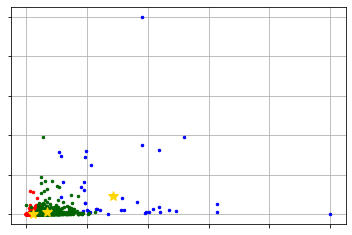

In [8]:
# initialize
initial_centers = kmeans_plusplus_initializer(sample, 3, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
# create instance of Fuzzy C-Means algorithm
fcm_instance = fcm(sample, initial_centers)
# run cluster analysis and obtain results
fcm_instance.process()
clusters = fcm_instance.get_clusters()
centers = fcm_instance.get_centers()
# visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, [x[:2] for x in sample])
visualizer.append_cluster([c[:2] for c in centers], marker='*', markersize=10)
visualizer.show()